# Identify Characteristic Values for the Spring Mass System - For-loop

For the identification of optimal parameters, the variation of a single parameter can be per-formed by a for-loop. All but one parameters are fixed according to the best guess result. One parameter p is varied in a defined range of 80 % up to 120 % of the value obtained in the best guess procedure. For all parameters in this range, a simulation is performed and the correspond-ing RMS score is determined. The parameter with the best score is used to simulate the system behavior and the best result is plotted in the specified time span. 

In this experimet, the measured data as plotted first.

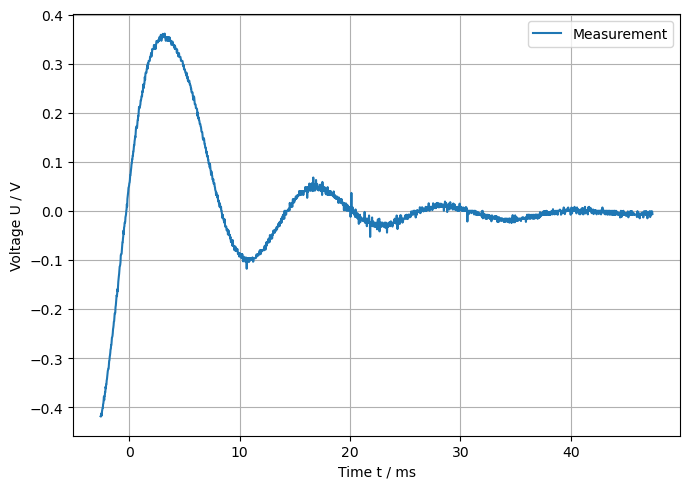

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read and format data
signal = pd.read_csv('scope_1.csv', header=1)
signal['time'] = signal['second']*1000
signal = signal.drop(['second'], axis=1)
signal = signal.rename(columns={'Volt': 'measurement'})

# Plot signals
ax1 = plt.figure(1, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal['time'], signal['measurement'], label='Measurement')
ax1.set_xlabel(r'Time t / ms')
ax1.set_ylabel(r'Voltage U / V')
ax1.legend()
ax1.grid()
plt.tight_layout()

The measured signal is compared with a simulated signal based on mathematical description

$x\left( t \right) = A_0 \cdot {e^{{\delta _0} \cdot \left( {t - {t_0}} \right)}} \cdot \cos \left( {\frac{{2 \cdot \pi }}{{{T_0}}} \cdot \left( {t - {t_0}} \right)} \right) \cdot \sigma \left( {t - {t_0}} \right)$

The parameters $T_0$, $t_0$ and $d_0$ are copied from the best guess method, the parameter $A_0$ is varied within a for-loop.

/var/folders/7b/77f4srw15n788bj4vzg5sm3w0000gn/T/ipykernel_81710/1248735239.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  optimization['rms'][n] = np.sqrt(((simulation - measurement)**2).sum() / N)
/var/folders/7b/77f4srw15n788bj4vzg5

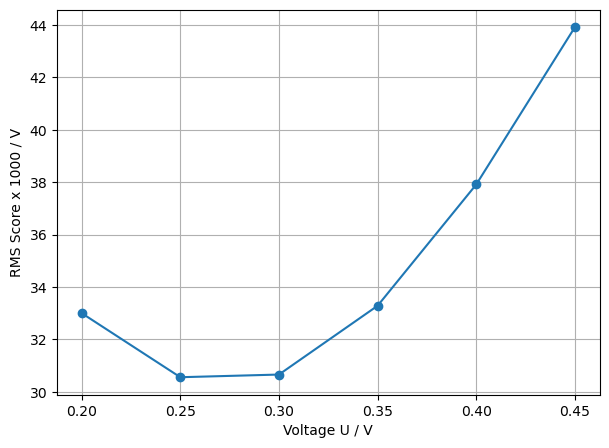

In [2]:
# Define parameters for simulation
#T_0 = 124.4/7
#t_0 = 4.6
#d_0 = -0.028
T_0 = 13
t_0 = 4
d_0 = -0.12



# Use for loop for optimization of one parameter
optimization = pd.DataFrame({'A_0': np.arange(0.2, 0.5, 0.05)})
optimization['rms'] = np.zeros(optimization.shape)

# Perform simlation and determine RMS score for each parameter
for n in optimization.index:
    signal['simulation'] = optimization['A_0'][n]*(np.exp(d_0*(signal['time']-t_0)) * np.cos(2*np.pi/T_0*(signal['time'] - t_0))) * (signal['time'] > 0)
    measurement = signal.loc[signal.time > 5, 'measurement']
    simulation = signal.loc[signal.time > 5, 'simulation']
    N = measurement.shape
    optimization['rms'][n] = np.sqrt(((simulation - measurement)**2).sum() / N)

# Plot optimization result
ax1 = plt.figure(2, figsize=(7, 5)).subplots(1, 1)
ax1.plot(optimization['A_0'], optimization['rms']*1000, 'C0o-')
ax1.set_xlabel(r'Voltage U / V')
ax1.set_ylabel(r'RMS Score x 1000 / V')
#ax1.axis([2., 2.35, 50, 75])
#ax1.set_yticks(np.arange(45, 80, 5))
ax1.grid()

The amplitude of $A_0$ =  2.15 V shoes the best RMS score. It is used to generate the final simulation.

RMS score: 0.0374968273153683


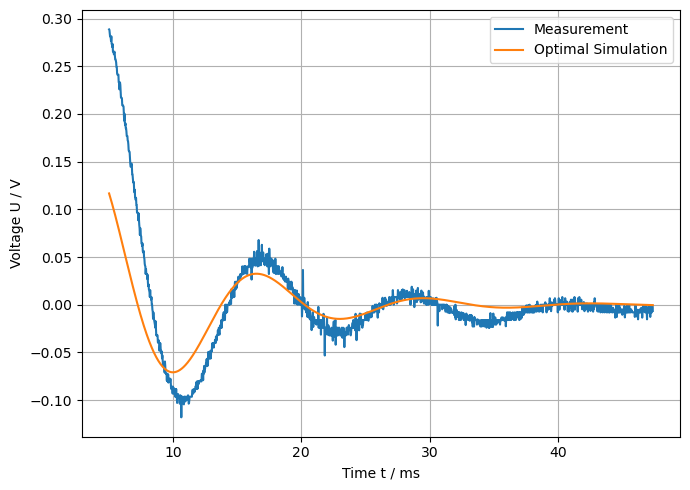

In [3]:
# Generate Signal with best parameter
A_0 = 0.15
signal['simulation'] = A_0 * (np.exp(d_0*(signal['time']-t_0)) * np.cos(2*np.pi/T_0*(signal['time']-t_0))) * (signal['time'] > 0)

# Plot signals
ax1 = plt.figure(3, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal.loc[signal.time > 5, 'time'], signal.loc[signal.time > 5, 'measurement'], label='Measurement')
ax1.plot(signal.loc[signal.time > 5, 'time'], signal.loc[signal.time > 5, 'simulation'], label='Optimal Simulation')
ax1.set_xlabel(r'Time t / ms')
ax1.set_ylabel(r'Voltage U / V')
ax1.legend()
ax1.grid()
plt.tight_layout()

# RMS score for comparison
measurement = signal.loc[signal.time > 5, 'measurement']
simulation = signal.loc[signal.time > 5, 'simulation']
N = measurement.shape
rms = np.sqrt(((simulation - measurement)**2).sum() / N)
print(f'RMS score: {rms[0]}')